In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import json 

# Funciones

In [2]:
def permutacion(arr):  
    if len(arr) == 0: 
        return [] 
    
    if len(arr) == 1: 
        return [arr] 

    res = []
   
    for i in range(len(arr)): 
        m = arr[i] 
        rems = arr[:i] + arr[i+1:] 
        
        for p in permutacion(rems): 
            res.append([m] + p) 
            
    return res

def verificar_grafo(g, q):
    nq = q['n']
    vq = q['v']
    res = True
    
    for u in vq:
        for v in vq[u]:
            ver_vertice = False
            
            n = g['n']
            vtc = g['v']

            if u in n and v in n:
                ver_vertice = v in vtc[u] or u in vtc[v] or u == v
            
            if not ver_vertice: 
                return False
    return True

def permutar_grafo(p, g):
    vp = [] 
    
    for i, v in enumerate(p):
        u = g['n'][i] 
        x = {u, v}
        
        if x not in vp:
            vp.append(x)
            
            gString = json.dumps(g, ensure_ascii=True)
    
            x = gString.index('n') + len('n')
            y = gString.index('v') + len('v')    

            gString = gString[:x] + gString[x:y - len('v')].replace(str(u), "TEMPORAL") + gString[y - len('v'): y] + gString[y:].replace(str(u), "TEMPORAL")
            gString = gString[:x] + gString[x:y - len('v')].replace(str(v), str(u)) + gString[y - len('v'): y] + gString[y:].replace(str(v), str(u))
            gString = gString[:x] + gString[x:y - len('v')].replace("TEMPORAL", str(v)) + gString[y - len('v'): y] + gString[y:].replace("TEMPORAL", str(v))
            
            g = json.loads(gString)
            
    return(g)

def aut(g):
    grafos = []
    permutaciones = []
    posilbes_permutaciones = permutacion(grafo['n'])
    
    for x in posilbes_permutaciones:
        q = permutar_grafo(x, grafo)
        
        if verificar_grafo(grafo, q):
            permutaciones.append(x)
            grafos.append(q)
    
    return {'permutaciones' : permutaciones, 
            'grafo' : grafos}

# Grafos

In [3]:
grafo = {'n':['a', 'b', 'c', 'd'],
         'v': {'a':['b', 'd'], 
              'b':['a', 'c'], 
              'c':['b', 'd'],
              'd':['c', 'a']}}

grafo = {'n':['a', 'b', 'c', 'd', 'e'],
         'v': {'a':['b'], 
              'b':['c', 'd'],
              'c':['b', 'd'],
              'd':['c', 'e'],
              'e':['d']}}

# Crear el grupo de automorfos

In [4]:
aut = aut(grafo)
aut['grafo'].insert(0, grafo)
aut['permutaciones'].insert(0, "grafo")

# Graficar aut(g)

grafo


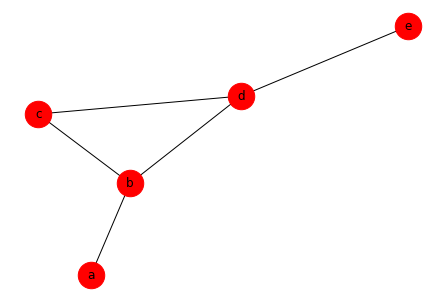

['a', 'b', 'c', 'd', 'e']


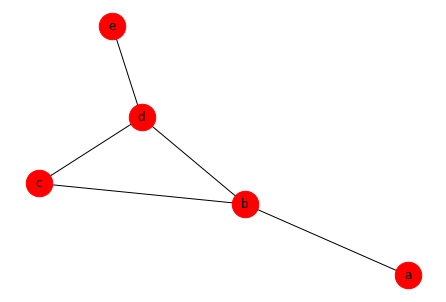

['e', 'd', 'c', 'b', 'a']


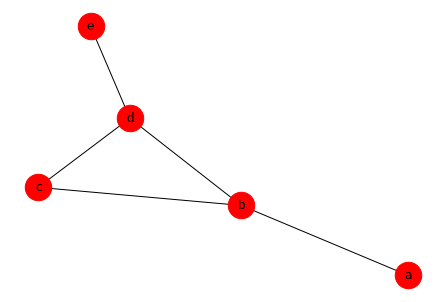

In [5]:
gps = []

for x in aut['grafo']:
    g = nx.Graph()
    for v in x['v']:
        for u in x['v'][v]:
            g.add_edge(v, u)
            
    gps.append(g)
            
for i, g in enumerate(gps):
    print(aut['permutaciones'][i])
    nx.draw(g, cmap = plt.get_cmap('jet'), with_labels = True, node_color='r', node_size = 700)
    plt.show()

# Imprimir el grupo aut(g)

In [6]:
pmt_automorf = []

for i, x in enumerate(aut['permutaciones']):
    if i > 0:
        rs = []
        for i, u in enumerate(x):
            v = grafo['n'][i]
            if u is not v and {v, u} not in rs:
                rs.append({v, u})
        pmt_automorf.append(rs)
        
string = "aut(g) = {"

for i, x in enumerate(pmt_automorf):        
    if i is 0:
        string += "()"
    else:
        string += str(x).replace("{", "(").replace("}", ")").replace("[", "").replace("]", "").replace("), ", ")").replace("'", "")
    if i is len(pmt_automorf) - 1:
        string += "}"
    else:
        string += " , "
        
print(string)

aut(g) = {() , (a, e)(d, b)}
